# Dice Game

In [434]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from operator import add
from operator import mul
import statistics

In [435]:
random.seed(a=5,version=2)

In [436]:
# Number of dice rolls
# Each dice roll is analogous to an "experiment."
N = 1000

In [437]:
ProbYesA = 5/6
ProbYesB = 1/3
WhichPlayer = 'A'
# The value of WhichPlayer determines which player is "right."

In [438]:
#The "errors" for each player, the E_j in the game writeup
ProbEA = 0.7
ProbEB = 0.7

In [439]:
random.random()

0.6229016948897019

In [440]:
# Make the list of dice rolls.
if WhichPlayer == 'A':
    dice_rolls_list = random.choices([1,-1],[ProbYesA,1-ProbYesA],k=N)
elif WhichPlayer == 'B':
    dice_rolls_list = random.choices([1,-1],[ProbYesB,1-ProbYesB],k=N)

In [441]:
# Show the fraction of rolls that were "no" and the fraction that were "yes."
downs = dice_rolls_list.count(-1)/N
print('noes =', downs)
ups = dice_rolls_list.count(1)/N
print('yeses =',ups)

noes = 0.157
yeses = 0.843


In [442]:
ups + downs

1.0

In [443]:
# For now, I am assuming that each player automatically agrees with the outcome
ResolutionA = dice_rolls_list.copy()
ResolutionB = dice_rolls_list.copy()

In [444]:
#ResolutionA

In [445]:
#ResolutionB

In [446]:
# Flip each player's resolution in accordance with their E
for i in range(0,N):
    num = random.random()
    if num < ProbEA and ResolutionA[i] < 0:
        ResolutionA[i] = -1*ResolutionA[i]

In [447]:
# Flip each player's resolution in accordance with their E
for i in range(0,N):
    num = random.random()
    if num < ProbEB and ResolutionA[i] > 0:
        ResolutionB[i] = -1*ResolutionB[i]

In [448]:
#ResolutionA

In [449]:
#ResolutionB

In [450]:
Resolution = [ResolutionA,ResolutionB]

In [451]:
PredictionsA = []
PredictionsB = []

for i in range(0,N):
    PredictionsA.append(ProbYesA)
    PredictionsB.append(ProbYesB)

In [452]:
Predictions = []
Predictions = [PredictionsA,PredictionsB]

#Predictions

In [453]:
# A function to calculate the mean resolution: This is V in the draft
def resolutions(resA,resB):
    result = []
    result = list(map(add, resA, resB))
    result = [element * (1/2) for element in result]
    return result

In [454]:
# A function to calculate the outcomes: This is q in the draft
def outcome(avres):
    result = []
    for i in range(0,len(avres)):
        if avres[i] > 0:
            result.append(1)
        elif avres[i] < 0:
            result.append(-1) 
        else: 
            result.append(0)
    return result

In [455]:
# Make a list of the mean resolutions V for our particular case.
resolutions_list = resolutions(ResolutionA,ResolutionB)

# Make a list of the outcomes q for our particular case. 
outcomes_list = outcome(resolutions_list)

In [456]:
#resolutions_list

In [457]:
#outcomes_list

In [458]:
#print(outcomes_list)
#print(resolutions_list)

In [459]:
# A function to calculate the suprisals for a user given a list of outcomes. s_{i,j} or Eq.(3) in the draft.
def surprisals(probs,outcms):
    result = []
    for i in range(len(outcms)):
        if outcms[i] == 1:
            result.append(-math.log(probs[i]))
        elif outcms[i] == -1:
            result.append(-math.log(1-probs[i]))
        elif outcms[i] == 0:
            result.append(0)
        else:
            result.append('nan')
    return result

In [460]:
# A function to calculate the mean of the two player's surprisals. Eq(4) of the draft. 
def mean_surps(surpsA,surpsB):
    result = []
    for i in range(len(surpsA)):
        result.append(statistics.mean([surpsA[i],surpsB[i]]))
    return result 

In [461]:
# Now make lists of the surprisals for each of the two players given the outcome list
surprisalsA = surprisals(PredictionsA,outcomes_list)
surprisalsB = surprisals(PredictionsB,outcomes_list)
#print(surprisalsA)
#print(surprisalsB)

In [462]:
# And calculate the mean of the two player's surprisals
mean_surprisals = mean_surps(surprisalsA,surprisalsB)

In [463]:
# A function to get the mean of the squared surprisals for each player. Eq.(5) of the draft. 
def mean_surps_sqrd(surpsA,surpsB):
    result = []
    for i in range(len(surpsA)):
        result.append(statistics.mean([pow(surpsA[i],2),pow(surpsB[i],2)]))
    return result 

In [464]:
# A function to get the mean of the spread, Delta s, (the standard deviation). Eq.(6) of the draft. 
def spread(surpsA,surpsB):
    result = []
    res = 0
    for i in range(len(surpsA)):
        res = math.sqrt(mean_surprisals_squared[i]-pow(mean_surprisals[i],2))
        result.append(res)
    return result

In [465]:
# A function to make a list of "big surprises" for each question given a list of mean surprisals and their spread. 
# Eq.(7) of the draft. 
def bigsurprise(means,spreads):
    result = []
    res = 0
    for i in range(len(means)):
        res = means[i]+spreads[i]
        result.append(res)
    return result

In [466]:
# Make a list of mean surprisals squared for our particular case.
mean_surprisals_squared = mean_surps_sqrd(surprisalsA,surprisalsB)

In [467]:
# Make a list of standard deviations for our particular case.
the_spreads = spread(surprisalsA,surprisalsB)

In [468]:
# Make a list of big surprises for our particular case.
big_surprises = bigsurprise(mean_surprisals,the_spreads)

In [469]:
# Make a list of rewards for each player recieves for EACH roll, 
# given their surprisals, the mean resolutions (reses), 
# and the standard deviations
def rewards(surpsA,surpsB,bigs,reses,spreads):
    resultsA = []
    resultsB = []
    for i in range(len(surpsA)):
        resultsA.append(abs(reses[i])*spreads[i]*(bigs[i]-surpsA[i]))
        resultsB.append(abs(reses[i])*spreads[i]*(bigs[i]-surpsB[i]))
    return resultsA,resultsB

In [470]:
# Make lists of the reward each player receives on each question.
final_rewardA, final_rewardB = rewards(surprisalsA,surprisalsB,big_surprises,resolutions_list,the_spreads)

In [471]:
# Make a list of the TOTAL reward player A has accumulated by each roll
totrewardA = []
totrewardA.append(final_rewardA[0])
for i in range(len(final_rewardA)-1):
    totrewardA.append(final_rewardA[i+1]+totrewardA[i])

In [472]:
# Make a list of the TOTAL reward player A has accumulated by each roll
totrewardB = []
totrewardB.append(final_rewardB[0])
for i in range(len(final_rewardB)-1):
    totrewardB.append(final_rewardB[i+1]+totrewardB[i])

In [473]:
#totrewardA

In [474]:
#totrewardB

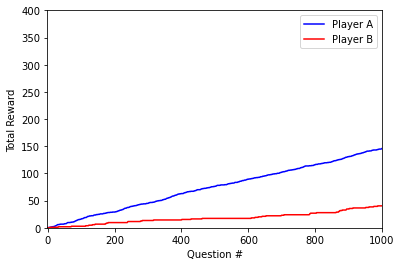

In [475]:
plt.plot(totrewardA,markersize=.8,c='b')
plt.plot(totrewardB,markersize=.8,c='r')
plt.xlabel('Question #')
plt.ylabel('Total Reward')
plt.xlim([-1, N])
plt.ylim([0,400])
plt.legend(['Player A','Player B'])